In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14
plt.style.use("fivethirtyeight")

In [72]:
ed= pd.read_csv('./Data/Most-Recent-Cohorts-All-Data-Elements.csv')

C:\Users\hwk70\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (9,1547,1589,1595,1596,1597,1598,1601,1602,1608,1619,1620,1621,1622,1623,1624,1625,1626,1627,1628,1629,1640,1643,1648,1653,1657,1664,1665,1666,1669,1670,1674,1679,1683,1688,1689,1690,1691,1692,1697,1700,1702,1703,1704,1705,1706,1707,1725,1726,1727,1728,1729,1743,1815,1816,1817,1818,1823,1824,1830,1831,1846,1879,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,1890,1891,1892,1893,1894,1895,1896,1897,1898,1909,1910,1911,1912,1913,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1983,1984,2376,2377) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [73]:
ed.head()

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,BBRR2_FED_UGCOMP_PAIDINFULL_SUPP,BBRR2_FED_UGCOMP_DISCHARGE_SUPP,LPSTAFFORD_CNT,LPSTAFFORD_AMT,LPPPLUS_CNT,LPPPLUS_AMT,LPGPLUS_CNT,LPGPLUS_AMT,FEDSCHCD,SEARCH_STRING
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,www.aamu.edu/admissions-aid/tuition-fees/net-p...,...,PrivacySuppressed,PrivacySuppressed,31374,922456254,5201,113949554,1004,15578483,001002,Alabama A & M University AAMU
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,https://www.uab.edu,https://uab.studentaidcalculator.com/survey.aspx,...,0.06289779108947,PrivacySuppressed,56997,1720042015,3727,87421879,3461,134126588,001052,University of Alabama at Birmingham
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,www.amridgeuniversity.edu,www2.amridgeuniversity.edu:9091/,...,PrivacySuppressed,PrivacySuppressed,4463,174222020,16,309618,298,16290781,016885,Amridge University Southern Christian Universi...
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu,finaid.uah.edu/,...,0.09598603839441,PrivacySuppressed,19702,407184805,1397,29789762,144,2377759,001055,University of Alabama in Huntsville UAH Unive...
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu,www.alasu.edu/cost-aid/tuition-costs/net-price...,...,PrivacySuppressed,PrivacySuppressed,34246,947070736,4602,95359062,587,12174367,001005,Alabama State University


In [74]:
print ("Rows     : " ,ed.shape[0])
print ("Columns  : " ,ed.shape[1])
print ("\nFeatures : \n" ,ed.columns.tolist())
print ("\nMissing values :  ", ed.isnull().sum().values.sum())
print ("\nUnique values :  \n",ed.nunique())

print("\nFirst 5 Rows :  \n",ed.head())

print("\nLast 5 Rows :  \n",ed.tail())

Rows     :  6806
Columns  :  2384

Features : 
 ['UNITID', 'OPEID', 'OPEID6', 'INSTNM', 'CITY', 'STABBR', 'ZIP', 'ACCREDAGENCY', 'INSTURL', 'NPCURL', 'SCH_DEG', 'HCM2', 'MAIN', 'NUMBRANCH', 'PREDDEG', 'HIGHDEG', 'CONTROL', 'ST_FIPS', 'REGION', 'LOCALE', 'LOCALE2', 'LATITUDE', 'LONGITUDE', 'CCBASIC', 'CCUGPROF', 'CCSIZSET', 'HBCU', 'PBI', 'ANNHI', 'TRIBAL', 'AANAPII', 'HSI', 'NANTI', 'MENONLY', 'WOMENONLY', 'RELAFFIL', 'ADM_RATE', 'ADM_RATE_ALL', 'SATVR25', 'SATVR75', 'SATMT25', 'SATMT75', 'SATWR25', 'SATWR75', 'SATVRMID', 'SATMTMID', 'SATWRMID', 'ACTCM25', 'ACTCM75', 'ACTEN25', 'ACTEN75', 'ACTMT25', 'ACTMT75', 'ACTWR25', 'ACTWR75', 'ACTCMMID', 'ACTENMID', 'ACTMTMID', 'ACTWRMID', 'SAT_AVG', 'SAT_AVG_ALL', 'PCIP01', 'PCIP03', 'PCIP04', 'PCIP05', 'PCIP09', 'PCIP10', 'PCIP11', 'PCIP12', 'PCIP13', 'PCIP14', 'PCIP15', 'PCIP16', 'PCIP19', 'PCIP22', 'PCIP23', 'PCIP24', 'PCIP25', 'PCIP26', 'PCIP27', 'PCIP29', 'PCIP30', 'PCIP31', 'PCIP38', 'PCIP39', 'PCIP40', 'PCIP41', 'PCIP42', 'PCIP43', 'PCIP4

In [75]:
edf_degree = ed[['PCIP01',
'PCIP03',
'PCIP04',
'PCIP05',
'PCIP09',
'PCIP10',
'PCIP11',
'PCIP12',
'PCIP13',
'PCIP14',
'PCIP15',
'PCIP16',
'PCIP19',
'PCIP22',
"PCIP23",
'PCIP24',
'PCIP25',
'PCIP26',
'PCIP27',
'PCIP29',
'PCIP30',
'PCIP31',
'PCIP38',
'PCIP39',
'PCIP40',
'PCIP41',
'PCIP42',
'PCIP43',
'PCIP44',
'PCIP45',
'PCIP46',
'PCIP47',
'PCIP48',
'PCIP49',
'PCIP50',
'PCIP51',
'PCIP52',
'PCIP54',
'MD_EARN_WNE_P6','C150_4', 'AVGFACSAL', 'CONTROL', 'PREDDEG', 'HIGHDEG', 'TUITIONFEE_IN', 'TUITIONFEE_OUT', 'SAT_AVG', 'CDR2']]


In [77]:
print ("Rows     : " ,edf_degree.shape[0])
print ("Columns  : " ,edf_degree.shape[1])
print ("\nFeatures : \n" ,edf_degree.columns.tolist())
print ("\nMissing values :  ", edf_degree.isnull().sum().values.sum())
print ("\nUnique values :  \n",edf_degree.nunique())

print("\nFirst 5 Rows :  \n",edf_degree.head())

print("\nLast 5 Rows :  \n",edf_degree.tail())

Rows     :  6806
Columns  :  48

Features : 
 ['PCIP01', 'PCIP03', 'PCIP04', 'PCIP05', 'PCIP09', 'PCIP10', 'PCIP11', 'PCIP12', 'PCIP13', 'PCIP14', 'PCIP15', 'PCIP16', 'PCIP19', 'PCIP22', 'PCIP23', 'PCIP24', 'PCIP25', 'PCIP26', 'PCIP27', 'PCIP29', 'PCIP30', 'PCIP31', 'PCIP38', 'PCIP39', 'PCIP40', 'PCIP41', 'PCIP42', 'PCIP43', 'PCIP44', 'PCIP45', 'PCIP46', 'PCIP47', 'PCIP48', 'PCIP49', 'PCIP50', 'PCIP51', 'PCIP52', 'PCIP54', 'MD_EARN_WNE_P6', 'C150_4', 'AVGFACSAL', 'CONTROL', 'PREDDEG', 'HIGHDEG', 'TUITIONFEE_IN', 'TUITIONFEE_OUT', 'SAT_AVG', 'CDR2']

Missing values :   50793

Unique values :  
 PCIP01             412
PCIP03             406
PCIP04             177
PCIP05             224
PCIP09             789
PCIP10             335
PCIP11             991
PCIP12             767
PCIP13            1044
PCIP14             595
PCIP15             820
PCIP16             340
PCIP19             592
PCIP22             361
PCIP23             572
PCIP24            1470
PCIP25              40
PCIP26  

TypeError: 'tuple' object is not callable

In [26]:
edf_degree.head()


,PCIP01,PCIP03,PCIP04,PCIP05,PCIP09,PCIP10,PCIP11,PCIP12,PCIP13,PCIP14,...,MD_EARN_WNE_P6,C150_4,AVGFACSAL,CONTROL,PREDDEG,HIGHDEG,TUITIONFEE_IN,TUITIONFEE_OUT,SAT_AVG,CDR2
0,0.0394,0.0237,0.0039,0.0000,0.0000,0.0394,0.0592,0.0,0.0710,0.1183,...,25200,0.2685,7101.0,1,3,4,9744.0,18354.0,957.0,0.114
1,0.0000,0.0000,0.0000,0.0016,0.0375,0.0000,0.0139,0.0,0.0717,0.0813,...,35100,0.5829,10717.0,1,3,4,8568.0,19704.0,1220.0,0.060
2,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,...,30700,0.4000,4292.0,2,3,4,6900.0,6900.0,NaN,0.071
3,0.0000,0.0000,0.0000,0.0000,0.0194,0.0000,0.0590,0.0,0.0283,0.2892,...,36200,0.5187,9442.0,1,3,4,10714.0,22362.0,1314.0,0.077
4,0.0000,0.0000,0.0000,0.0000,0.0892,0.0000,0.0585,0.0,0.1169,0.0000,...,22600,0.3001,7754.0,1,3,4,11068.0,19396.0,972.0,0.132


In [27]:
edf_degree.dtypes

PCIP01            float64
PCIP03            float64
PCIP04            float64
PCIP05            float64
PCIP09            float64
PCIP10            float64
PCIP11            float64
PCIP12            float64
PCIP13            float64
PCIP14            float64
PCIP15            float64
PCIP16            float64
PCIP19            float64
PCIP22            float64
PCIP23            float64
PCIP24            float64
PCIP25            float64
PCIP26            float64
PCIP27            float64
PCIP29            float64
PCIP30            float64
PCIP31            float64
PCIP38            float64
PCIP39            float64
PCIP40            float64
PCIP41            float64
PCIP42            float64
PCIP43            float64
PCIP44            float64
PCIP45            float64
PCIP46            float64
PCIP47            float64
PCIP48            float64
PCIP49            float64
PCIP50            float64
PCIP51            float64
PCIP52            float64
PCIP54            float64
MD_EARN_WNE_

In [28]:
edf_degree = edf_degree.apply (pd.to_numeric, errors ='coerce')

In [29]:
edf_degree.dtypes

PCIP01            float64
PCIP03            float64
PCIP04            float64
PCIP05            float64
PCIP09            float64
PCIP10            float64
PCIP11            float64
PCIP12            float64
PCIP13            float64
PCIP14            float64
PCIP15            float64
PCIP16            float64
PCIP19            float64
PCIP22            float64
PCIP23            float64
PCIP24            float64
PCIP25            float64
PCIP26            float64
PCIP27            float64
PCIP29            float64
PCIP30            float64
PCIP31            float64
PCIP38            float64
PCIP39            float64
PCIP40            float64
PCIP41            float64
PCIP42            float64
PCIP43            float64
PCIP44            float64
PCIP45            float64
PCIP46            float64
PCIP47            float64
PCIP48            float64
PCIP49            float64
PCIP50            float64
PCIP51            float64
PCIP52            float64
PCIP54            float64
MD_EARN_WNE_

In [31]:
edf_degree = edf_degree.dropna(axis = 0)

In [32]:
print ("Rows     : " ,edf_degree.shape[0])
print ("Columns  : " ,edf_degree.shape[1])
print ("\nFeatures : \n" ,edf_degree.columns.tolist())
print ("\nMissing values :  ", edf_degree.isnull().sum().values.sum())
print ("\nUnique values :  \n",edf_degree.nunique())

print("\nFirst 5 Rows :  \n",edf_degree.head())

print("\nLast 5 Rows :  \n",edf_degree.tail())

Rows     :  1228
Columns  :  48

Features : 
 ['PCIP01', 'PCIP03', 'PCIP04', 'PCIP05', 'PCIP09', 'PCIP10', 'PCIP11', 'PCIP12', 'PCIP13', 'PCIP14', 'PCIP15', 'PCIP16', 'PCIP19', 'PCIP22', 'PCIP23', 'PCIP24', 'PCIP25', 'PCIP26', 'PCIP27', 'PCIP29', 'PCIP30', 'PCIP31', 'PCIP38', 'PCIP39', 'PCIP40', 'PCIP41', 'PCIP42', 'PCIP43', 'PCIP44', 'PCIP45', 'PCIP46', 'PCIP47', 'PCIP48', 'PCIP49', 'PCIP50', 'PCIP51', 'PCIP52', 'PCIP54', 'MD_EARN_WNE_P6', 'C150_4', 'AVGFACSAL', 'CONTROL', 'PREDDEG', 'HIGHDEG', 'TUITIONFEE_IN', 'TUITIONFEE_OUT', 'SAT_AVG', 'CDR2']

Missing values :   0

Unique values :  
 PCIP01             162
PCIP03             319
PCIP04             130
PCIP05             183
PCIP09             613
PCIP10              90
PCIP11             537
PCIP12              37
PCIP13             690
PCIP14             432
PCIP15             225
PCIP16             282
PCIP19             251
PCIP22             125
PCIP23             471
PCIP24             532
PCIP25               5
PCIP26      

In [ ]:
edf_degree.shape()

In [368]:
tut_diff = edf["TUITIONFEE_OUT"] - edf["TUITIONFEE_IN"]


In [369]:
edf = edf.assign(tut_diff = edf["TUITIONFEE_OUT"] - edf["TUITIONFEE_IN"])

In [34]:
edf_corr = edf_degree.corr();
edf_corr

,PCIP01,PCIP03,PCIP04,PCIP05,PCIP09,PCIP10,PCIP11,PCIP12,PCIP13,PCIP14,...,MD_EARN_WNE_P6,C150_4,AVGFACSAL,CONTROL,PREDDEG,HIGHDEG,TUITIONFEE_IN,TUITIONFEE_OUT,SAT_AVG,CDR2
PCIP01,1.000000,0.212840,0.050116,-0.050388,-0.010798,-0.004200,-0.029523,0.116270,0.006202,0.050944,...,-0.059998,-0.048699,-0.005947,-0.172576,-0.067957,-0.027289,-0.155885,-0.113855,-0.027649,0.059274
PCIP03,0.212840,1.000000,0.039158,0.202871,-0.023472,-0.036040,-0.001865,0.023984,-0.097488,0.003425,...,-0.026223,0.149289,0.110729,-0.108320,-0.035916,-0.079201,0.027145,0.109347,0.141607,-0.101599
PCIP04,0.050116,0.039158,1.000000,0.012749,-0.001664,0.045673,0.070498,0.004625,-0.116070,0.181742,...,0.101182,0.120567,0.144773,0.015624,0.012616,0.071707,0.101610,0.140143,0.134893,-0.042544
PCIP05,-0.050388,0.202871,0.012749,1.000000,-0.050814,-0.028061,0.091130,-0.024022,-0.155622,-0.025933,...,0.084834,0.280114,0.317687,0.000772,-0.062530,-0.138092,0.186104,0.260042,0.318211,-0.154704
PCIP09,-0.010798,-0.023472,-0.001664,-0.050814,1.000000,-0.005356,-0.039729,-0.052336,0.026989,-0.112770,...,-0.071408,0.071653,0.090131,-0.091136,0.117946,0.120609,-0.031959,0.022494,-0.009374,-0.009297
PCIP10,-0.004200,-0.036040,0.045673,-0.028061,-0.005356,1.000000,0.211598,0.001863,-0.048431,-0.015772,...,-0.013330,0.000873,0.001117,0.082272,0.006040,0.040049,0.040073,0.025323,0.002842,-0.036293
PCIP11,-0.029523,-0.001865,0.070498,0.091130,-0.039729,0.211598,1.000000,-0.008408,-0.175201,0.299061,...,0.255662,0.148264,0.303202,-0.109001,0.035011,0.029616,0.029420,0.127969,0.253226,-0.079307
PCIP12,0.116270,0.023984,0.004625,-0.024022,-0.052336,0.001863,-0.008408,1.000000,-0.029352,-0.036089,...,-0.083358,-0.092291,-0.049787,-0.087696,-0.149028,-0.041208,-0.093136,-0.116758,-0.092085,0.101240
PCIP13,0.006202,-0.097488,-0.116070,-0.155622,0.026989,-0.048431,-0.175201,-0.029352,1.000000,-0.216133,...,-0.291342,-0.243441,-0.370296,-0.013601,0.081499,0.092953,-0.185956,-0.287006,-0.262836,0.114505
PCIP14,0.050944,0.003425,0.181742,-0.025933,-0.112770,-0.015772,0.299061,-0.036089,-0.216133,1.000000,...,0.464403,0.257303,0.365042,-0.153348,0.050637,0.119972,0.016861,0.156712,0.369519,-0.138610


<AxesSubplot:>

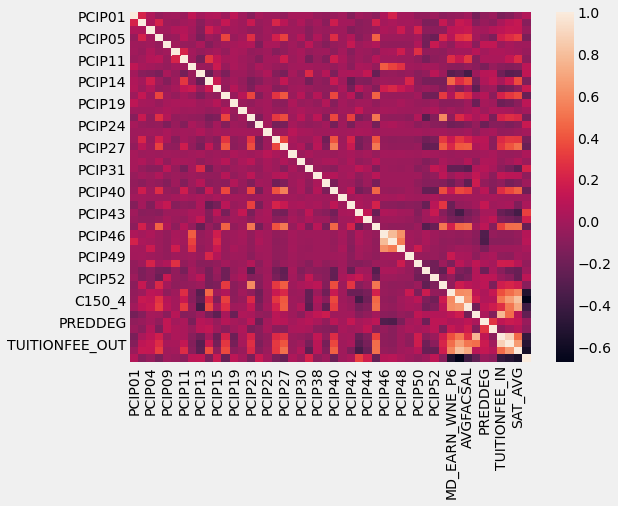

In [35]:
sns.heatmap(edf_corr)

In [386]:
sns.distplot(edf['MN_EARN_WNE_INC_6'], bins=40, kde=True)

KeyError: 'MN_EARN_WNE_INC_6'

In [37]:
edf_degree.describe()

,PCIP01,PCIP03,PCIP04,PCIP05,PCIP09,PCIP10,PCIP11,PCIP12,PCIP13,PCIP14,...,MD_EARN_WNE_P6,C150_4,AVGFACSAL,CONTROL,PREDDEG,HIGHDEG,TUITIONFEE_IN,TUITIONFEE_OUT,SAT_AVG,CDR2
count,1228.000000,1228.000000,1228.000000,1228.000000,1228.000000,1228.000000,1228.000000,1228.000000,1228.000000,1228.000000,...,1228.000000,1228.000000,1228.000000,1228.000000,1228.000000,1228.000000,1228.000000,1228.000000,1228.000000,1228.000000
mean,0.007176,0.009087,0.003042,0.003406,0.038862,0.001983,0.029663,0.000361,0.052721,0.043332,...,36669.706840,0.576205,8268.103420,1.614821,2.981270,3.841205,24406.228827,29032.343648,1142.402280,0.055615
std,0.027439,0.021152,0.015230,0.010101,0.036522,0.013558,0.042829,0.003219,0.056470,0.100868,...,9284.294259,0.175872,2502.520413,0.495135,0.141506,0.374443,14758.373356,11692.406177,124.269036,0.036465
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19200.000000,0.000000,2884.000000,1.000000,1.000000,2.000000,480.000000,480.000000,785.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.008250,0.000000,0.002950,0.000000,0.002650,0.000000,...,31200.000000,0.455875,6602.250000,1.000000,3.000000,4.000000,10518.000000,19567.000000,1060.000000,0.031000
50%,0.000000,0.000000,0.000000,0.000000,0.033450,0.000000,0.020900,0.000000,0.041150,0.000000,...,35200.000000,0.570650,7796.000000,2.000000,3.000000,4.000000,23256.000000,27875.000000,1124.000000,0.048500
75%,0.000000,0.010900,0.000000,0.002200,0.059900,0.000000,0.037425,0.000000,0.079700,0.043275,...,40100.000000,0.693400,9507.500000,2.000000,3.000000,4.000000,34902.500000,36297.000000,1201.000000,0.071000
max,0.412300,0.384600,0.295600,0.164300,0.354800,0.308200,0.532000,0.059900,0.645200,0.875200,...,120400.000000,1.000000,20484.000000,3.000000,3.000000,4.000000,59430.000000,59430.000000,1566.000000,0.295000


In [38]:
sns.pairplot(edf_degree);

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001BF5117FF70> (for post_execute):


KeyboardInterrupt: 

In [ ]:
edf2['C150_4'].describe()

In [179]:
edf2 = edf[['C150_4', 'AVGFACSAL', 'TUITIONFEE_IN', 'TUITIONFEE_OUT', 'SAT_AVG', 'CDR2', 'tut_diff']]
edf2


,C150_4,AVGFACSAL,TUITIONFEE_IN,TUITIONFEE_OUT,SAT_AVG,CDR2,tut_diff
0,0.2685,7101.0,9744.0,18354.0,957.0,0.114,8610.0
1,0.5829,10717.0,8568.0,19704.0,1220.0,0.060,11136.0
3,0.5187,9442.0,10714.0,22362.0,1314.0,0.077,11648.0
4,0.3001,7754.0,11068.0,19396.0,972.0,0.132,8328.0
5,0.7188,10225.0,10780.0,29230.0,1252.0,0.066,18450.0
...,...,...,...,...,...,...,...
5001,0.4091,4413.0,19500.0,19500.0,1060.0,0.024,0.0
5112,0.5124,9477.0,36450.0,36450.0,1237.0,0.037,0.0
5191,0.3333,5016.0,30370.0,30370.0,1120.0,0.083,0.0
5238,0.5857,6698.0,13352.0,13352.0,1180.0,0.032,0.0


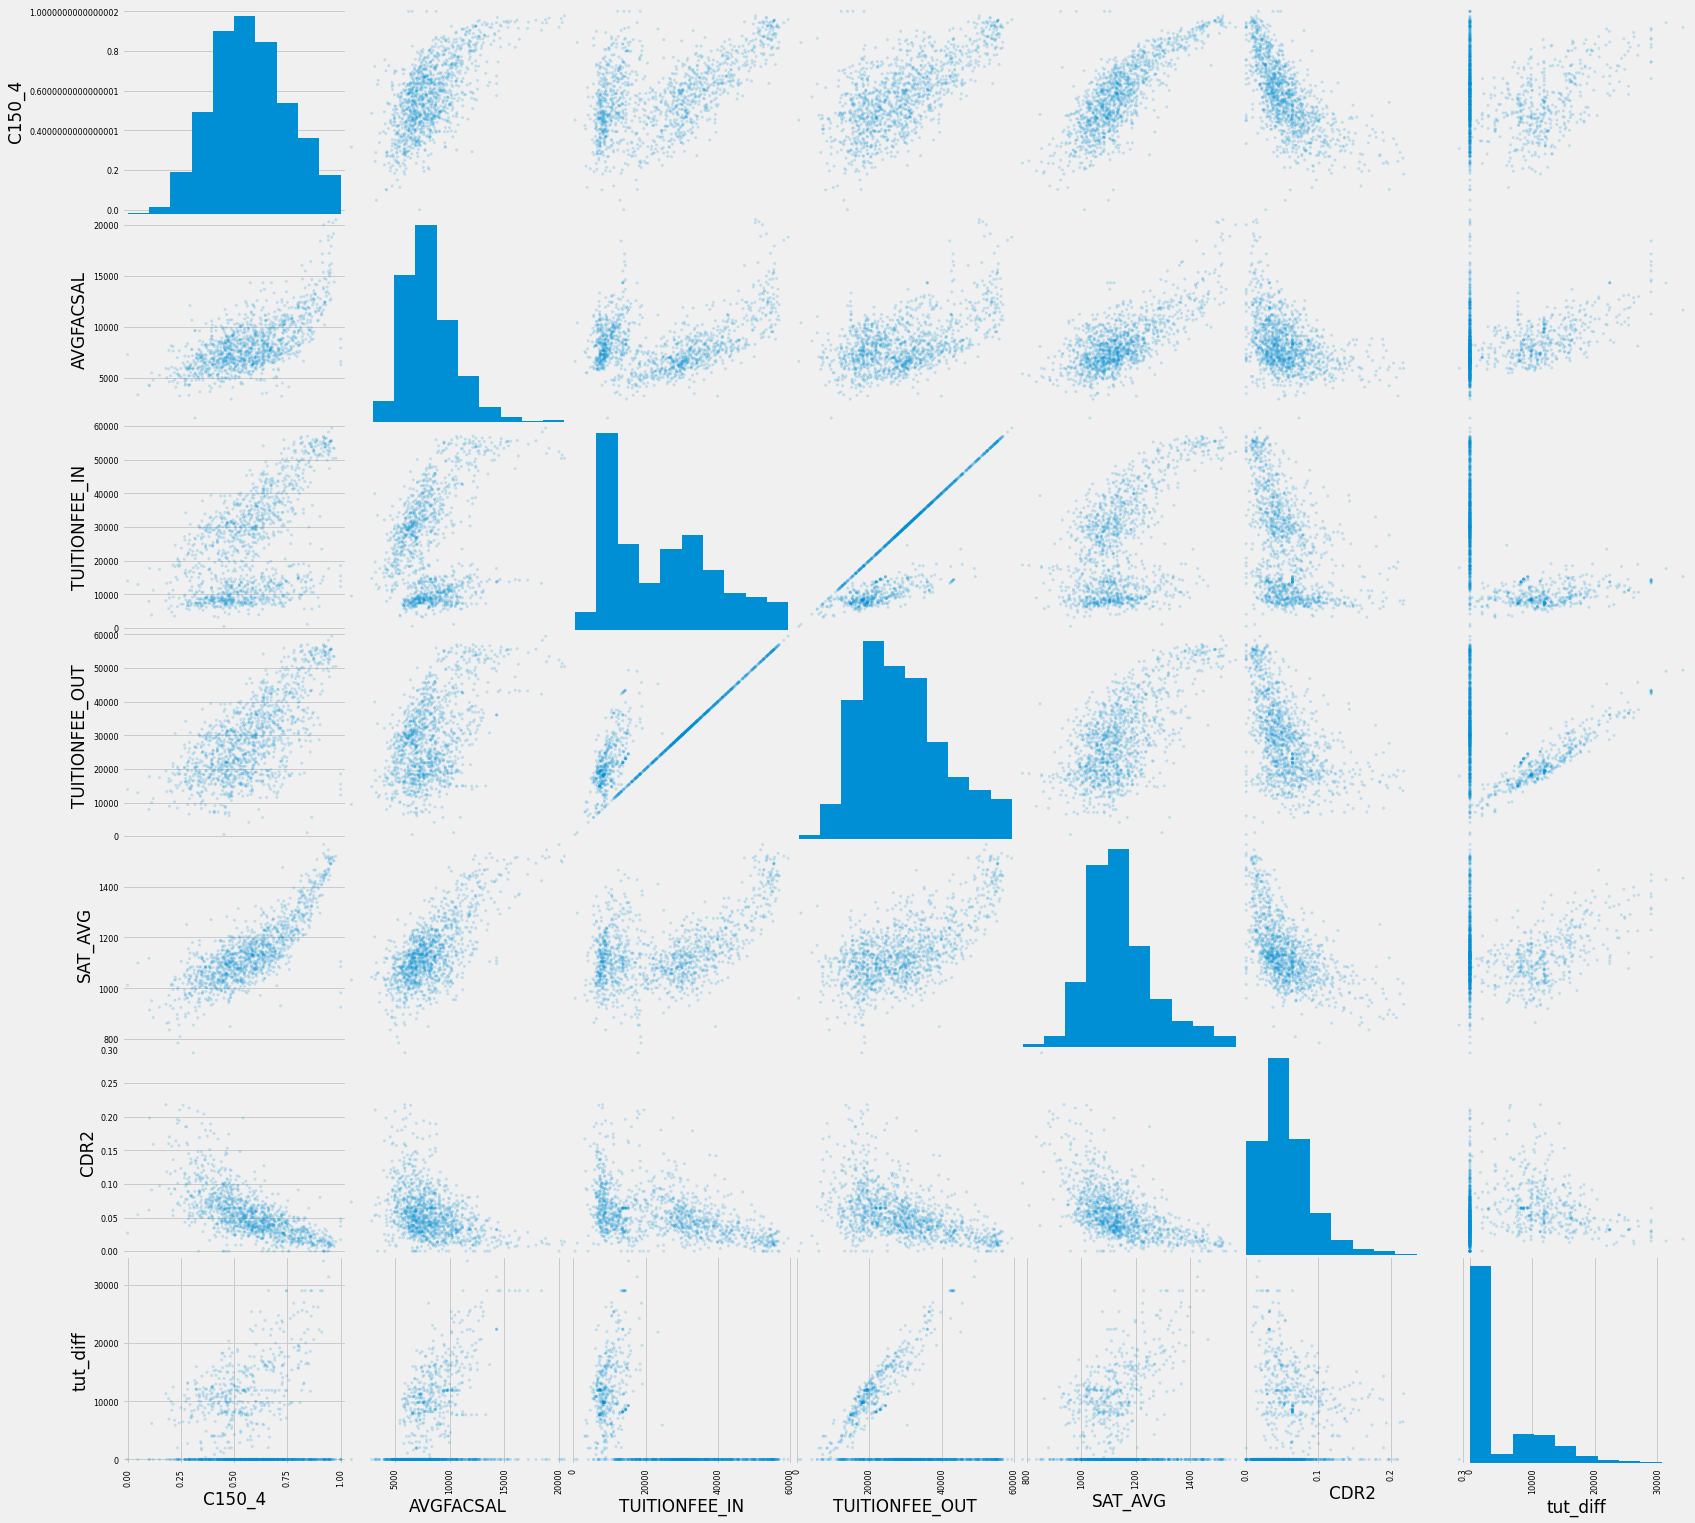

In [181]:
pd.plotting.scatter_matrix(edf2, alpha =0.2, figsize=(25,25));

In [182]:
edf.dtypes

C150_4            float64
AVGFACSAL         float64
CONTROL             int64
PREDDEG             int64
HIGHDEG             int64
TUITIONFEE_IN     float64
TUITIONFEE_OUT    float64
SAT_AVG           float64
CDR2              float64
INSTNM             object
tut_diff          float64
dtype: object

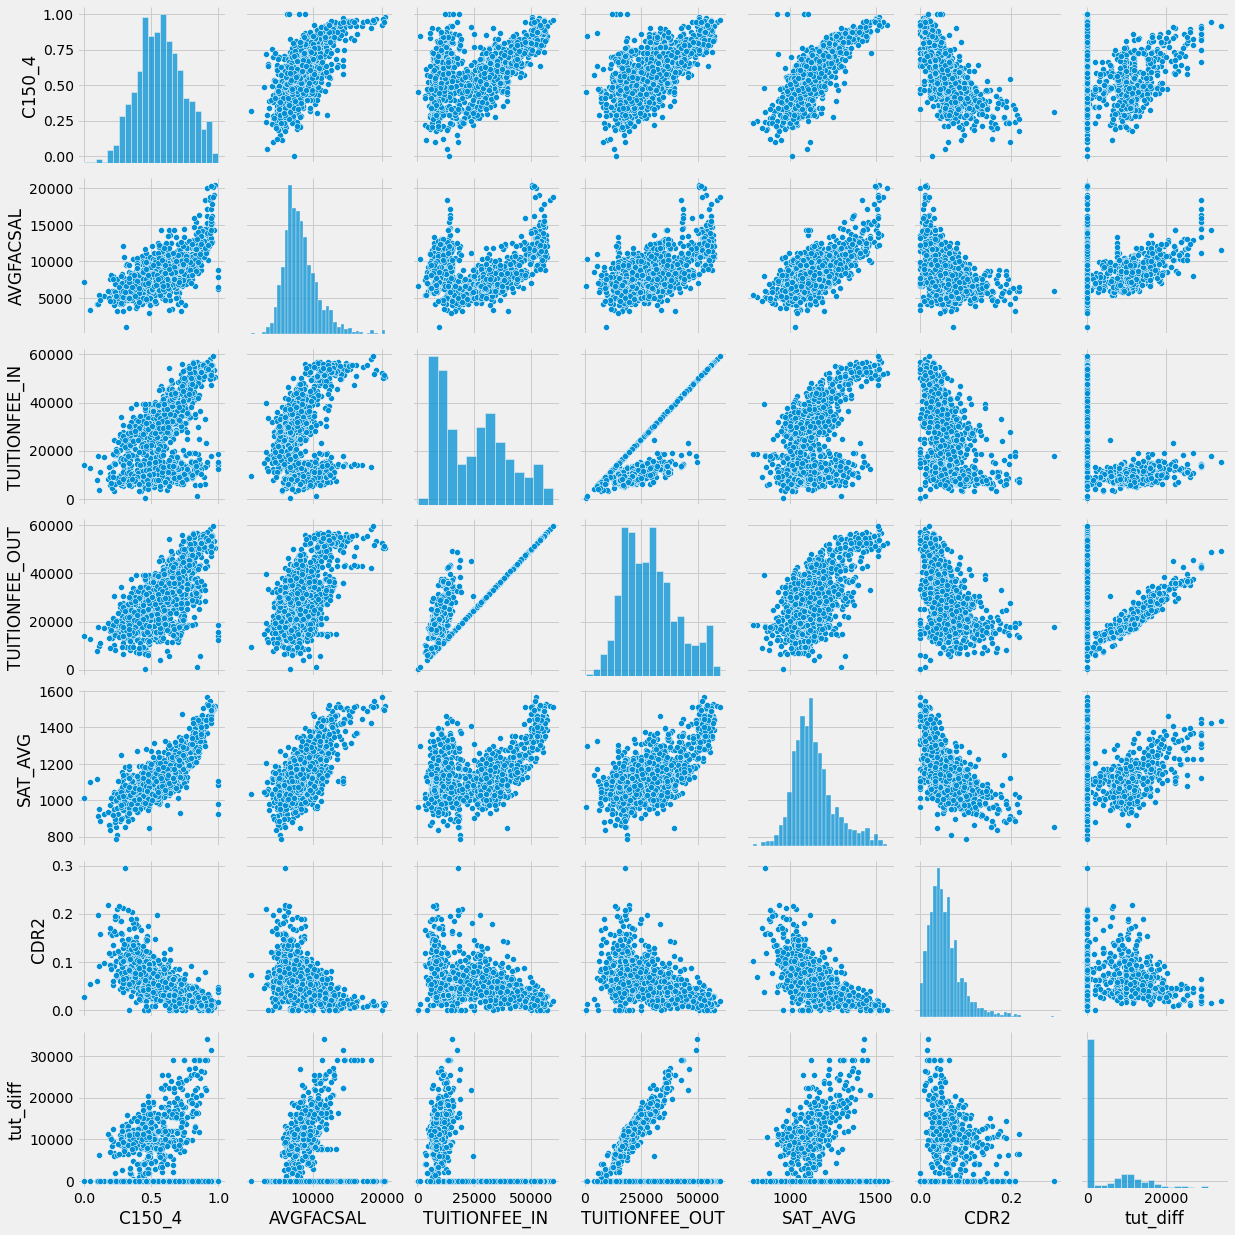

In [183]:
sns.pairplot(edf2);

In [184]:
in_tuition=edf[['INSTNM', 'TUITIONFEE_IN', 'TUITIONFEE_OUT',]]

In [185]:
instate = in_tuition.sort_values(by = 'TUITIONFEE_IN', ascending = False)

In [186]:
top50=instate.head(25)

<AxesSubplot:>

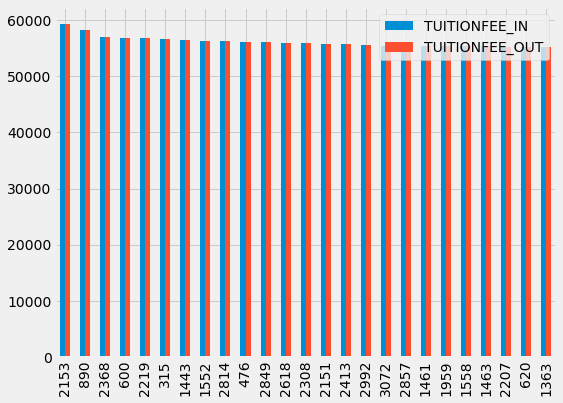

In [187]:
top50.plot(kind='bar')

In [40]:
feature_cols =  ['PCIP01', 'PCIP03', 'PCIP04', 'PCIP05', 'PCIP09', 'PCIP10', 'PCIP11', 'PCIP12', 'PCIP13', 'PCIP14', 'PCIP15', 'PCIP16', 'PCIP19', 'PCIP22', 'PCIP23', 'PCIP24', 'PCIP25', 'PCIP26', 'PCIP27', 'PCIP29', 'PCIP30', 'PCIP31', 'PCIP38', 'PCIP39', 'PCIP40', 'PCIP41', 'PCIP42', 'PCIP43', 'PCIP44', 'PCIP45', 'PCIP46', 'PCIP47', 'PCIP48', 'PCIP49', 'PCIP50', 'PCIP51', 'PCIP52', 'PCIP54', 'C150_4', 'AVGFACSAL', 'CONTROL', 'PREDDEG', 'HIGHDEG', 'TUITIONFEE_IN', 'TUITIONFEE_OUT', 'SAT_AVG', 'CDR2']

In [41]:
X = edf_degree[feature_cols]
y= edf_degree.MD_EARN_WNE_P6


In [42]:
print((type(X)))
print((type(X.values)))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [43]:
print((type(y)))
print((type(y.values)))

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
lr = LinearRegression()
type(lr)

sklearn.linear_model._base.LinearRegression

In [46]:
lr.fit(X,y)

LinearRegression()

In [47]:
print(lr.intercept_)
print(lr.coef_)

543853.3907434976
[-5.28346353e+05 -5.53754299e+05 -5.24596591e+05 -5.57773907e+05
 -5.35216709e+05 -5.20304192e+05 -5.09571754e+05 -6.05373176e+05
 -5.27838913e+05 -5.02118272e+05 -5.21830848e+05 -5.73188493e+05
 -5.29389152e+05 -5.10433469e+05 -5.49641665e+05 -5.29518827e+05
 -3.11794624e+05 -5.05344990e+05 -5.12540733e+05 -5.72028209e+05
 -5.19076238e+05 -5.27000084e+05 -5.31158225e+05 -5.27072663e+05
 -5.63152052e+05 -5.70293478e+05 -5.41528960e+05 -5.26974435e+05
 -5.26135779e+05 -5.20634915e+05 -5.40054783e+05 -5.06328574e+05
 -5.21846361e+05 -4.83547717e+05 -5.34734541e+05 -5.09771846e+05
 -5.15559084e+05 -5.17247992e+05  8.04751540e+03  1.18901746e+00
 -1.34725790e+03  3.16648533e+02 -1.81467217e+02  1.81839349e-01
 -5.94663371e-02  2.12895866e+00 -4.72148811e+04]


In [48]:
list(zip(feature_cols, lr.coef_))

[('PCIP01', -528346.352520105),
 ('PCIP03', -553754.2988043041),
 ('PCIP04', -524596.5912565503),
 ('PCIP05', -557773.907009013),
 ('PCIP09', -535216.7093512664),
 ('PCIP10', -520304.1923465225),
 ('PCIP11', -509571.75391112466),
 ('PCIP12', -605373.1763224874),
 ('PCIP13', -527838.9133753967),
 ('PCIP14', -502118.27210357896),
 ('PCIP15', -521830.8478462812),
 ('PCIP16', -573188.4934053251),
 ('PCIP19', -529389.1523394324),
 ('PCIP22', -510433.4690976428),
 ('PCIP23', -549641.6651357845),
 ('PCIP24', -529518.8266956777),
 ('PCIP25', -311794.62417480187),
 ('PCIP26', -505344.9898191451),
 ('PCIP27', -512540.73256369785),
 ('PCIP29', -572028.2092529424),
 ('PCIP30', -519076.23768706986),
 ('PCIP31', -527000.0837021196),
 ('PCIP38', -531158.22536443),
 ('PCIP39', -527072.6630329354),
 ('PCIP40', -563152.052037932),
 ('PCIP41', -570293.4779198733),
 ('PCIP42', -541528.9604693702),
 ('PCIP43', -526974.4347729305),
 ('PCIP44', -526135.7790518552),
 ('PCIP45', -520634.91500132653),
 ('PCIP46

In [49]:
X2 = sm.add_constant(X)  #Adds our y intercept
est = sm.OLS(y, X2)  # adds our OLS model
est2 = est.fit() # fits our model
print(est2.summary()) #Tada!

                            OLS Regression Results                            
Dep. Variable:         MD_EARN_WNE_P6   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     67.14
Date:                Sun, 21 Mar 2021   Prob (F-statistic):          1.88e-296
Time:                        19:34:41   Log-Likelihood:                -12162.
No. Observations:                1228   AIC:                         2.442e+04
Df Residuals:                    1180   BIC:                         2.467e+04
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           5.439e+05   1.02e+06      0.

In [50]:
from sklearn import metrics
import numpy as np

In [51]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
# Define a function that accepts a list of features and returns testing RMSE.
def train_test_rmse(edf, feature_cols, response):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1234)
    
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [54]:
print(train_test_rmse(edf_degree, feature_cols, 'MD_EARN_WNE_P6'))

4867.442290927862


In [55]:
from sklearn.tree import DecisionTreeRegressor

# List of values to try for max_depth:
max_depth_range = range(1, 21)

# List to store the average RMSE for each value of max_depth:
RMSE_scores = []

# Use 10-fold cross-validation with each value of max_depth.
from sklearn.model_selection import cross_val_score
for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=1)
    MSE_scores = cross_val_score(treereg, X, y, cv=10, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

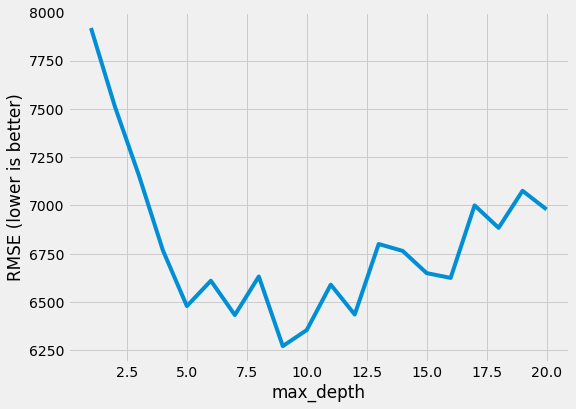

In [56]:
plt.plot(max_depth_range, RMSE_scores);
plt.xlabel('max_depth');
plt.ylabel('RMSE (lower is better)');

In [57]:
# Show the best RMSE and the corresponding max_depth.
sorted(zip(RMSE_scores, max_depth_range))[0]

(6271.157506491536, 9)

In [58]:
treereg = DecisionTreeRegressor(max_depth=3, random_state=1)
treereg.fit(X, y)

DecisionTreeRegressor(max_depth=3, random_state=1)

In [59]:
pd.DataFrame({'feature':feature_cols, 'importance':treereg.feature_importances_}).sort_values(by='importance', ascending=False)

,feature,importance
38,C150_4,0.485355
46,CDR2,0.161724
9,PCIP14,0.126594
17,PCIP26,0.102898
35,PCIP51,0.087318
4,PCIP09,0.036112
27,PCIP43,0.000000
28,PCIP44,0.000000
29,PCIP45,0.000000
30,PCIP46,0.000000


In [60]:
from sklearn.ensemble import RandomForestRegressor

In [61]:
rfreg = RandomForestRegressor(n_estimators=150,
                              max_features=5,
                              oob_score=True,
                              random_state=1)

rfreg.fit(X, y)

RandomForestRegressor(max_features=5, n_estimators=150, oob_score=True,
                      random_state=1)

In [62]:
# Compute the out-of-bag R-squared score.
print((rfreg.oob_score_))


0.6944380064746165


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1234)

In [63]:
rfreg = RandomForestRegressor(n_estimators=150, max_features=4, oob_score=True, random_state=1)
rfreg.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [66]:
# List of values to try for max_features:
feature_range = range(1, len(feature_cols) + 1)

# List to store the average RMSE for each value of max_features:
RMSE_scores = []

# Use 10-fold cross-validation with each value of max_features (Warning: Super slow!).
#for feature in feature_range:
   # rfreg = RandomForestRegressor(n_estimators=150, max_features=feature, random_state=1)
   # MSE_scores = cross_val_score(rfreg, X, y, cv=2, scoring='neg_mean_squared_error')
    #RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

ValueError: x and y must have same first dimension, but have shapes (47,) and (0,)

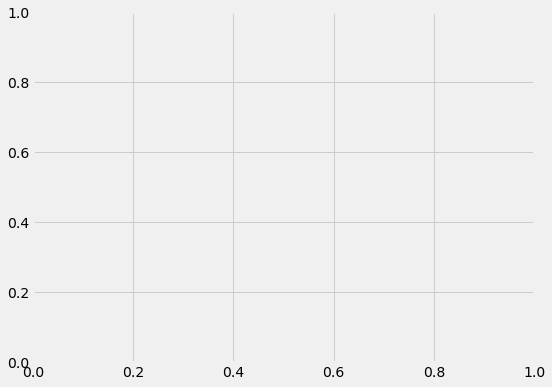

In [67]:
plt.plot(feature_range, RMSE_scores);

plt.xlabel('max_features');
plt.ylabel('RMSE (lower is better)');

In [68]:
# Show the best RMSE and the corresponding max_features.
sorted(zip(RMSE_scores, feature_range))[0]

IndexError: list index out of range

In [69]:
from sklearn.model_selection import GridSearchCV
estimator_range = list(range(10, 310, 10))
feature_range = list(range(1, len(feature_cols) + 1))
param_grid={'n_estimators':estimator_range, 'max_features':feature_range}


rf = RandomForestRegressor(random_state=1)
GSclf = GridSearchCV(rf,param_grid, cv=5)
GSclf.fit(X,y)

KeyboardInterrupt: 

In [ ]:
RSclf.best_params_

TypeError: 'tuple' object is not callable